#Создать датасет

In [ ]:
import  matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
def get_dataset(samples, features, classes):
  if features > 3:
    inf = int(features*0.8)
  else:
    inf = 2
  uninf = features - inf
  X, y = make_classification(n_samples=samples,
                             n_features=features,
                             n_informative=inf,
                             n_redundant=uninf,
                             random_state=1,
                             n_clusters_per_class = 1,
                             n_classes=classes)
  return X, y

In [ ]:
def to_dataframe(X, y):
  df = pd.DataFrame(X)
  df.index = np.arange(X.shape[0])
  names = []
  for i,c in enumerate(df.columns):
    names.append('Feature '+str(i))
    i += 1
  df.columns = names
  df['Label'] = y
  return df

# Бинарный

In [ ]:
X, y = get_dataset(1000, 2, 2)
bin_df = to_dataframe(X,y)
print(bin_df.shape)
print(Counter(y))

(1000, 3)
Counter({1: 500, 0: 500})


<Figure size 1600x1600 with 0 Axes>

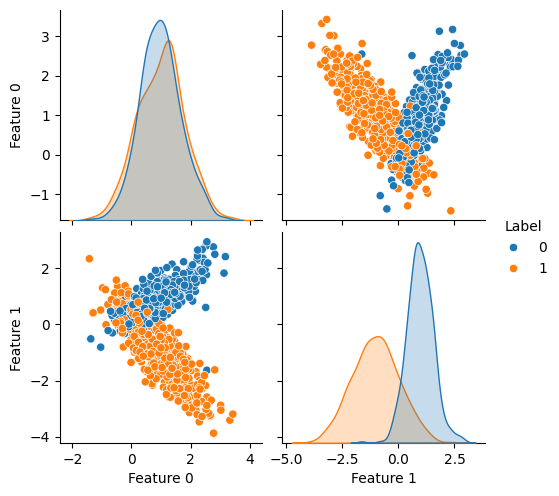

In [ ]:
plt.figure(figsize=(16,16));
sns.pairplot(data=bin_df, hue='Label');

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X_train, y_train)
print(model.predict(X[:2, :]))
print(model.predict_proba(X[:2, :]))
print(model.score(X, y))
print(model.score(X_test, y_test))

[1 1]
[[0.02205261 0.97794739]
 [0.15766731 0.84233269]]
0.902
0.9


In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)*100

90.0

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5974235104669887

In [ ]:
# !pip install mlxtend --upgrade

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

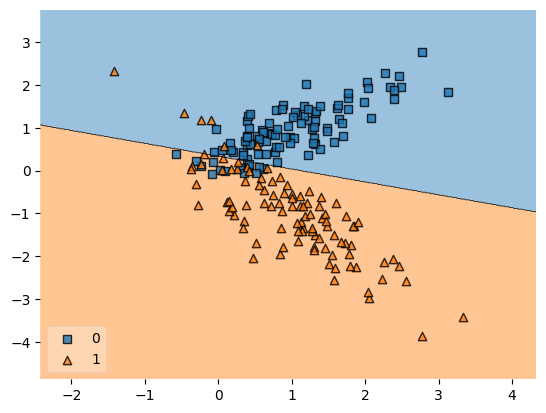

In [ ]:
plot_decision_regions(X_test, y_test, clf=model, legend=3)

# Multifeature

In [ ]:
X, y = get_dataset(1000, 5, 4)
mul_df = to_dataframe(X,y)
print(mul_df.shape)
print(Counter(y))

(1000, 6)
Counter({0: 253, 1: 250, 3: 249, 2: 248})


<Figure size 1600x1600 with 0 Axes>

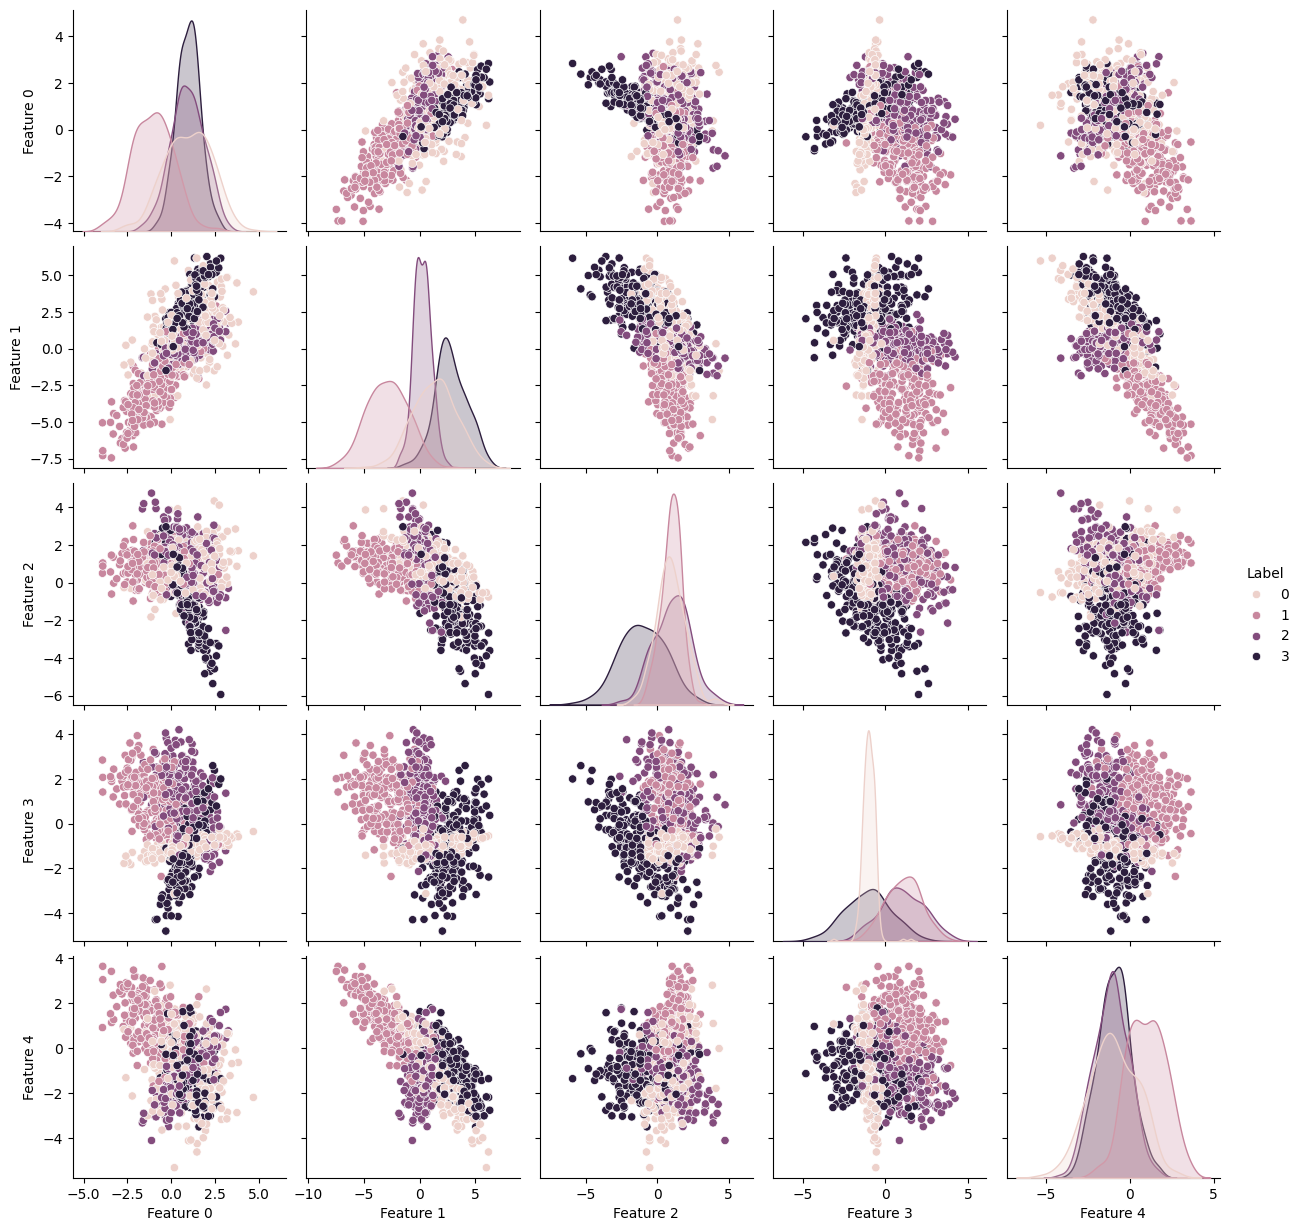

In [ ]:
plt.figure(figsize=(16,16));
sns.pairplot(data=mul_df, hue='Label');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_mul = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
from sklearn.svm import SVC

model_mul = SVC().fit(X_train, y_train)

In [ ]:

print(model_mul.predict([X[2, :]]))
# print(model_mul.predict_proba(X[:2, :]))
print(model_mul.score(X, y))
print(model_mul.score(X_test, y_test))

[3]
0.895
0.9


In [ ]:
y_pred = model_mul.predict(X_test)
accuracy_score(y_test, y_pred)*100

90.0

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5835756222918347

/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


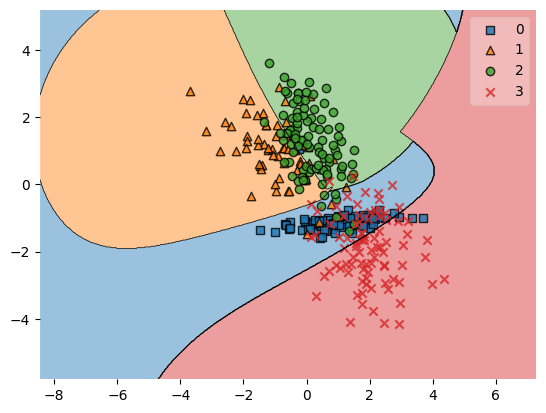

In [ ]:
fig = plot_decision_regions(X, y, clf=model_mul,
              feature_index=[1, 3],
              filler_feature_values={0: np.mean(X[:,0]),
                                     2: np.mean(X[:,2]),
                                     4: np.mean(X[:,4])},
              filler_feature_ranges={0: np.std(X[:,0]),
                                     2: np.std(X[:,0]),
                                     4: np.std(X[:,0])}
              )

# Threshold

In [ ]:
X, y = get_dataset(1000, 5, 2)
bin_df_2 = to_dataframe(X,y)
print(bin_df_2.shape)
print(Counter(y))

(1000, 6)
Counter({0: 501, 1: 499})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
model_h.predict_proba(X_test[:10])

array([[9.39844335e-01, 6.01556650e-02],
       [8.91774070e-01, 1.08225930e-01],
       [9.84337729e-01, 1.56622706e-02],
       [8.55599309e-01, 1.44400691e-01],
       [9.02374035e-01, 9.76259648e-02],
       [3.24216247e-01, 6.75783753e-01],
       [9.97718230e-01, 2.28176983e-03],
       [9.41622668e-01, 5.83773321e-02],
       [6.39053431e-06, 9.99993609e-01],
       [2.24660379e-04, 9.99775340e-01]])

In [ ]:
model_h = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
probs = model_h.predict_proba(X_test)[:,1]

## h = 0.5

In [ ]:
preds = model_h.predict(X_test)
print(probs[5], preds[5])

0.6757837525648535 1


In [ ]:
accuracy_score(y_test, preds)

0.995

## h = 0.9

In [ ]:
preds_threshold = (probs >= 0.9).astype(int)
accuracy_score(y_test, preds_threshold)

0.98

#CrossVal

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', penalty='l2', C=0.001)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.757 (0.044)
